# Multi-Tiered Model: Logistic functions fit to cumulative deaths & XGboost to fit residuals

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import git
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir

In [4]:
# import cumulative data
df = pd.read_csv(f"{homedir}/data/us/covid/nyt_us_counties.csv", 
                 converters={'fips' : str, 'date' : str})
print(str(len(df)) + " entries total")
df.tail()

98262 entries total


,date,county,state,fips,cases,deaths
98257,2020-04-28,Sublette,Wyoming,56035,1,0
98258,2020-04-28,Sweetwater,Wyoming,56037,10,0
98259,2020-04-28,Teton,Wyoming,56039,65,1
98260,2020-04-28,Uinta,Wyoming,56041,6,0
98261,2020-04-28,Washakie,Wyoming,56043,4,0


In [27]:
# import daily ("per day") data
dfd = pd.read_csv(f"{homedir}/data/us/covid/nyt_us_counties_daily.csv", 
                  converters={'fips' : str, 'date' : str, 'deaths' : float})
print(str(len(dfd)) + " entries total")
dfd.tail()

97428 entries total


,fips,date,county,state,cases,deaths
97423,41025,2020-04-28,Harney,Oregon,1.0,0.0
97424,46017,2020-04-28,Buffalo,South Dakota,1.0,0.0
97425,48295,2020-04-28,Lipscomb,Texas,1.0,0.0
97426,48399,2020-04-28,Runnels,Texas,1.0,0.0
97427,51077,2020-04-28,Grayson,Virginia,1.0,0.0


In [6]:
# check for erroneous fips, dates, counties
fips = df['fips']
dates = df['date']
counties = df['county']
states = df['state']
tot = 0
for i in range(len(fips)):
    if fips[i] == "":
        tot += 1
        print(df.iloc[i])
print(tot)

date         2020-03-01
county    New York City
state          New York
fips                   
cases                 1
deaths                0
Name: 416, dtype: object
date        2020-03-01
county         Unknown
state     Rhode Island
fips                  
cases                2
deaths               0
Name: 418, dtype: object
date         2020-03-02
county    New York City
state          New York
fips                   
cases                 1
deaths                0
Name: 448, dtype: object
date        2020-03-02
county         Unknown
state     Rhode Island
fips                  
cases                2
deaths               0
Name: 450, dtype: object
date         2020-03-03
county    New York City
state          New York
fips                   
cases                 2
deaths                0
Name: 482, dtype: object
date        2020-03-03
county         Unknown
state     Rhode Island
fips                  
cases                2
deaths               0
Name: 485, dtype: object
date

date      2020-03-23
county       Unknown
state       Colorado
fips                
cases              5
deaths             0
Name: 8392, dtype: object
date      2020-03-23
county       Unknown
state        Florida
fips                
cases              1
deaths             0
Name: 8450, dtype: object
date      2020-03-23
county       Unknown
state        Georgia
fips                
cases             46
deaths             2
Name: 8520, dtype: object
date      2020-03-23
county       Unknown
state           Guam
fips                
cases             29
deaths             1
Name: 8524, dtype: object
date      2020-03-23
county       Unknown
state         Hawaii
fips                
cases              5
deaths             0
Name: 8529, dtype: object
date      2020-03-23
county       Unknown
state       Illinois
fips                
cases             58
deaths             0
Name: 8564, dtype: object
date      2020-03-23
county       Unknown
state       Kentucky
fips                
case

Name: 16286, dtype: object
date      2020-03-28
county       Unknown
state       Kentucky
fips                
cases             60
deaths             0
Name: 16501, dtype: object
date      2020-03-28
county       Unknown
state      Louisiana
fips                
cases             12
deaths             2
Name: 16556, dtype: object
date      2020-03-28
county       Unknown
state          Maine
fips                
cases              5
deaths             0
Name: 16573, dtype: object
date         2020-03-28
county          Unknown
state     Massachusetts
fips                   
cases               358
deaths                0
Name: 16611, dtype: object
date      2020-03-28
county       Unknown
state       Michigan
fips                
cases             47
deaths             0
Name: 16668, dtype: object
date      2020-03-28
county       Unknown
state      Minnesota
fips                
cases              1
deaths             0
Name: 16709, dtype: object
date       2020-03-28
county        U

Name: 25214, dtype: object
date      2020-04-01
county       Unknown
state     New Jersey
fips                
cases           4512
deaths             7
Name: 25245, dtype: object
date         2020-04-01
county    New York City
state          New York
fips                   
cases             47440
deaths             1374
Name: 25296, dtype: object
date                    2020-04-01
county                     Unknown
state     Northern Mariana Islands
fips                              
cases                            6
deaths                           1
Name: 25428, dtype: object
date       2020-04-01
county        Unknown
state     Puerto Rico
fips                 
cases             286
deaths             11
Name: 25635, dtype: object
date        2020-04-01
county         Unknown
state     Rhode Island
fips                  
cases              179
deaths               8
Name: 25640, dtype: object
date      2020-04-01
county       Unknown
state      Tennessee
fips                
case

date         2020-04-05
county          Unknown
state     Massachusetts
fips                   
cases               215
deaths                0
Name: 34260, dtype: object
date      2020-04-05
county       Unknown
state       Michigan
fips                
cases            306
deaths             0
Name: 34329, dtype: object
date      2020-04-05
county       Unknown
state      Minnesota
fips                
cases              0
deaths             4
Name: 34386, dtype: object
date       2020-04-05
county    Kansas City
state        Missouri
fips                 
cases             175
deaths              1
Name: 34510, dtype: object
date      2020-04-05
county       Unknown
state         Nevada
fips                
cases             52
deaths             0
Name: 34614, dtype: object
date         2020-04-05
county          Unknown
state     New Hampshire
fips                   
cases                 6
deaths                0
Name: 34626, dtype: object
date      2020-04-05
county       Unknow

Name: 43903, dtype: object
date      2020-04-09
county       Unknown
state       Kentucky
fips                
cases              0
deaths             7
Name: 44226, dtype: object
date      2020-04-09
county       Unknown
state      Louisiana
fips                
cases             51
deaths             2
Name: 44288, dtype: object
date      2020-04-09
county       Unknown
state          Maine
fips                
cases              4
deaths             0
Name: 44309, dtype: object
date         2020-04-09
county          Unknown
state     Massachusetts
fips                   
cases               203
deaths                5
Name: 44350, dtype: object
date      2020-04-09
county       Unknown
state       Michigan
fips                
cases            368
deaths             5
Name: 44420, dtype: object
date       2020-04-09
county    Kansas City
state        Missouri
fips                 
cases             257
deaths              8
Name: 44610, dtype: object
date      2020-04-09
county    

Name: 51258, dtype: object
date      2020-04-12
county       Unknown
state       Arkansas
fips                
cases             25
deaths             0
Name: 51326, dtype: object
date      2020-04-12
county       Unknown
state       Colorado
fips                
cases            156
deaths             0
Name: 51438, dtype: object
date       2020-04-12
county        Unknown
state     Connecticut
fips                 
cases             501
deaths              4
Name: 51449, dtype: object
date      2020-04-12
county       Unknown
state        Florida
fips                
cases              2
deaths             0
Name: 51518, dtype: object
date      2020-04-12
county       Unknown
state        Georgia
fips                
cases            613
deaths             0
Name: 51665, dtype: object
date      2020-04-12
county       Unknown
state           Guam
fips                
cases            716
deaths             5
Name: 51681, dtype: object
date      2020-04-12
county       Unknown
state  

Name: 58543, dtype: object
date        2020-04-14
county         Unknown
state     Rhode Island
fips                  
cases              756
deaths              60
Name: 58548, dtype: object
date      2020-04-14
county       Unknown
state           Utah
fips                
cases              0
deaths             8
Name: 58928, dtype: object
date      2020-04-14
county       Unknown
state        Vermont
fips                
cases              8
deaths             0
Name: 58944, dtype: object
date          2020-04-14
county           Unknown
state     Virgin Islands
fips                    
cases                 51
deaths                 1
Name: 58948, dtype: object
date      2020-04-14
county       Unknown
state       Virginia
fips                
cases              0
deaths            32
Name: 59063, dtype: object
date      2020-04-14
county       Unknown
state     Washington
fips                
cases            220
deaths             0
Name: 59107, dtype: object
date      2020-04-1

Name: 66238, dtype: object
date         2020-04-17
county          Unknown
state     New Hampshire
fips                   
cases                 2
deaths                0
Name: 66251, dtype: object
date      2020-04-17
county       Unknown
state     New Jersey
fips                
cases            719
deaths             3
Name: 66272, dtype: object
date         2020-04-17
county    New York City
state          New York
fips                   
cases            127352
deaths             8632
Name: 66328, dtype: object
date      2020-04-17
county       Unknown
state       New York
fips                
cases              0
deaths           630
Name: 66352, dtype: object
date        2020-04-17
county         Unknown
state     North Dakota
fips                  
cases                1
deaths               0
Name: 66480, dtype: object
date                    2020-04-17
county                     Unknown
state     Northern Mariana Islands
fips                              
cases               

Name: 74540, dtype: object
date         2020-04-20
county          Unknown
state     New Hampshire
fips                   
cases                 4
deaths                1
Name: 74553, dtype: object
date      2020-04-20
county       Unknown
state     New Jersey
fips                
cases            660
deaths             1
Name: 74574, dtype: object
date         2020-04-20
county    New York City
state          New York
fips                   
cases            136816
deaths            10009
Name: 74631, dtype: object
date                    2020-04-20
county                     Unknown
state     Northern Mariana Islands
fips                              
cases                           14
deaths                           2
Name: 74786, dtype: object
date       2020-04-20
county        Unknown
state     Puerto Rico
fips                 
cases            1252
deaths             42
Name: 75040, dtype: object
date        2020-04-20
county         Unknown
state     Rhode Island
fips         

Name: 84644, dtype: object
date      2020-04-24
county       Unknown
state           Guam
fips                
cases            993
deaths             6
Name: 84660, dtype: object
date      2020-04-24
county       Unknown
state       Illinois
fips                
cases            218
deaths             0
Name: 84782, dtype: object
date      2020-04-24
county       Unknown
state           Iowa
fips                
cases              0
deaths             1
Name: 84960, dtype: object
date      2020-04-24
county       Unknown
state       Kentucky
fips                
cases             19
deaths             0
Name: 85152, dtype: object
date      2020-04-24
county       Unknown
state      Louisiana
fips                
cases             63
deaths             0
Name: 85215, dtype: object
date      2020-04-24
county       Unknown
state       Maryland
fips                
cases              0
deaths            92
Name: 85261, dtype: object
date         2020-04-24
county          Unknown
state  

Name: 95584, dtype: object
date      2020-04-28
county       Unknown
state       Colorado
fips                
cases             88
deaths             0
Name: 95697, dtype: object
date       2020-04-28
county        Unknown
state     Connecticut
fips                 
cases             491
deaths              2
Name: 95708, dtype: object
date      2020-04-28
county       Unknown
state       Delaware
fips                
cases             32
deaths             0
Name: 95713, dtype: object
date      2020-04-28
county       Unknown
state        Florida
fips                
cases              4
deaths             0
Name: 95778, dtype: object
date      2020-04-28
county       Unknown
state        Georgia
fips                
cases            268
deaths             0
Name: 95925, dtype: object
date      2020-04-28
county       Unknown
state           Guam
fips                
cases           1001
deaths             6
Name: 95941, dtype: object
date      2020-04-28
county       Unknown
state  

In [7]:
# same check for daily dataset
fips = dfd['fips']
dates = dfd['date']
counties = dfd['county']
states = dfd['state']
for i in range(len(fips)):
    if fips[i] == "":
        print(dfd.iloc[i])

In [8]:
c_fips = set(list(df['fips']))
d_fips = set(list(dfd['fips']))
print(len(c_fips))
print(len(d_fips))

2833
2834


In [9]:
# cumulative dataset contains rows with missing fips entries, whereas daily dataset does not
# since scoring is based on daily dataset, we'll remove these rows from the cumulative dataset
df = df[df['fips'] != ""]
print(len(df))

97083


In [10]:
# recall the daily dataset has 97428 entries, but this trimmed cumulative dataset now has 97083
# entries; let's investigate this discrepancy by looking at the discrepancy in counties
c_fips = set(list(df['fips']))
d_fips = set(list(dfd['fips']))
c_fips = set(map(int, c_fips))
d_fips = set(map(int, d_fips))
dif = list(d_fips - c_fips)
print("FIPS in daily dataset that aren't in cumulative dataset: " + str(dif[0]) + ", " 
      + str(dif[1]))

FIPS in daily dataset that aren't in cumulative dataset: 66010, 36061


In [11]:
# let's examine these two counties
print(dfd[dfd['fips'] == '66010'])
print(dfd[dfd['fips'] == '36061'])

        fips        date   county state  cases  deaths
19569  66010  2020-03-15  Unknown  Guam    3.0     0.0
19570  66010  2020-03-16  Unknown  Guam    0.0     0.0
19571  66010  2020-03-17  Unknown  Guam    0.0     0.0
19572  66010  2020-03-18  Unknown  Guam    5.0     0.0
19573  66010  2020-03-19  Unknown  Guam    4.0     0.0
19574  66010  2020-03-20  Unknown  Guam    2.0     0.0
19575  66010  2020-03-21  Unknown  Guam    1.0     0.0
19576  66010  2020-03-22  Unknown  Guam   12.0     1.0
19577  66010  2020-03-23  Unknown  Guam    2.0     0.0
19578  66010  2020-03-24  Unknown  Guam    3.0     0.0
19579  66010  2020-03-25  Unknown  Guam    0.0     0.0
19580  66010  2020-03-26  Unknown  Guam   17.0     0.0
19581  66010  2020-03-27  Unknown  Guam    4.0     0.0
19582  66010  2020-03-28  Unknown  Guam    4.0     0.0
19583  66010  2020-03-29  Unknown  Guam    1.0     0.0
19584  66010  2020-03-30  Unknown  Guam    2.0     0.0
19585  66010  2020-03-31  Unknown  Guam   79.0     1.0
19586  660

In [12]:
# note that this cell was run immediately after reimporting
# the cumulative dataset to df, that is df here is untrimmed
print(df[df['county'] == 'New York City'])

Empty DataFrame
Columns: [date, county, state, fips, cases, deaths]
Index: []


In [13]:
# it's clear at this point that the cumulative dataset
# has missing FIPS code for a large number of entries;
# so we can just compute cumulative deaths from the
# daily data later (for FIPS consistency purposes) and
# scrap the cumulative dataset

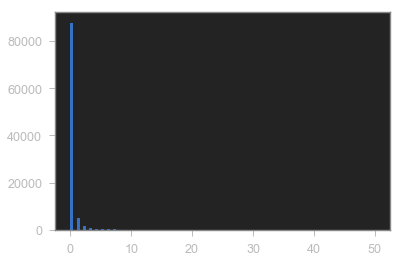

In [38]:
bd = (dfd[dfd['deaths'] <= 50])
bdl = list(bd['deaths'])
plt.hist(bdl, bins=100)
plt.show()

In [ ]:
from datetime import date
from datetime import timedelta # to be used later for building a submission file

# Returns a 3-tuple of the year, month, and day of the date "ds". Assumes ds is a string 
# in form "year-month-day"
def date_from_str(ds):
    year = int(ds[:4])
    month = int(ds[5:7])
    day = int(ds[8:])
    return (year, month, day)

dates = np.array(dfd['date'])
day_rank = []
date_benchmark = date(2018, 1, 1) # some arbitrary date long before COVID-19 was around

# compute all dates' day ranks
for i in range(len(dates)):
    year, month, day = date_from_str(dates[i])
    date_cur = date(year, month, day)
    day_rank.append((date_cur - date_benchmark).days)

# Add days since reference date 1/1/2018; this will be used for fitting later
df['day_rank'] = np.array(day_rank)
df.head()

In [ ]:
class data_entry:
    def __init__(self, deaths=[], times=[]):
        self.deaths = deaths
        self.times = times

# organize data into dictionary dbf (data by FIPS) by 
# each county's FIPS key
dbf = {}
fips = dfd['fips']
for i in range(len(dfd)):
    